# Синусоида


In [21]:
import numpy as np
import matplotlib.pyplot as plt

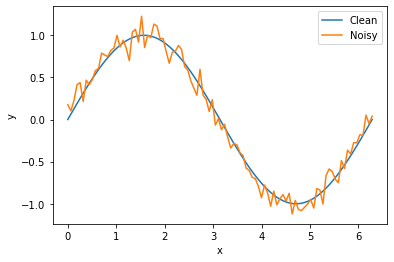

In [22]:
# Set random seed for reproducibility
np.random.seed(0)

# Define the range of x values
x = np.linspace(0, 2 * np.pi, 100)

# Generate the clean sine wave
y_clean = np.sin(x)

# Generate white noise
noise = np.random.normal(0, 0.1, len(x))

# Add white noise to the clean sine wave
y_noisy = y_clean + noise

# Plot the clean and noisy sine wave
plt.plot(x, y_clean, label='Clean')
plt.plot(x, y_noisy, label='Noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [23]:
#!pip install torch


Epoch [100/10000], Loss: 0.2490
Epoch [200/10000], Loss: 0.2355
Epoch [300/10000], Loss: 0.2304
Epoch [400/10000], Loss: 0.2284
Epoch [500/10000], Loss: 0.2277
Epoch [600/10000], Loss: 0.2274
Epoch [700/10000], Loss: 0.2273
Epoch [800/10000], Loss: 0.2272
Epoch [900/10000], Loss: 0.2272
Epoch [1000/10000], Loss: 0.2272
Epoch [1100/10000], Loss: 0.2272
Epoch [1200/10000], Loss: 0.2272
Epoch [1300/10000], Loss: 0.2272
Epoch [1400/10000], Loss: 0.2272
Epoch [1500/10000], Loss: 0.2272
Epoch [1600/10000], Loss: 0.2272
Epoch [1700/10000], Loss: 0.2272
Epoch [1800/10000], Loss: 0.2272
Epoch [1900/10000], Loss: 0.2272
Epoch [2000/10000], Loss: 0.2272
Epoch [2100/10000], Loss: 0.2272
Epoch [2200/10000], Loss: 0.2272
Epoch [2300/10000], Loss: 0.2272
Epoch [2400/10000], Loss: 0.2272
Epoch [2500/10000], Loss: 0.2272
Epoch [2600/10000], Loss: 0.2272
Epoch [2700/10000], Loss: 0.2272
Epoch [2800/10000], Loss: 0.2272
Epoch [2900/10000], Loss: 0.2272
Epoch [3000/10000], Loss: 0.2272
Epoch [3100/10000],

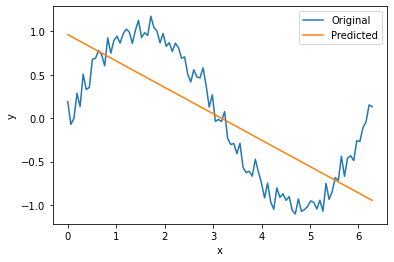

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(0)

# Define the dataset
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
# Generate white noise
noise = np.random.normal(0, 0.1, len(x))

y = y_clean + noise
# Convert the data to PyTorch tensors
x_tensor = torch.from_numpy(x).unsqueeze(1).float()
y_tensor = torch.from_numpy(y).unsqueeze(1).float()

# Define the model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

model = RegressionModel()

def calculate_r_squared(model, inputs, targets):
    # Evaluate the model's predictions
    predicted = model(inputs)
    
    # Calculate the sum of squares of residuals
    residuals = targets - predicted
    ss_residuals = torch.sum(residuals**2)
    
    # Calculate the total sum of squares
    mean_targets = torch.mean(targets)
    ss_total = torch.sum((targets - mean_targets)**2)
    
    # Calculate R-squared
    r_squared = 1 - (ss_residuals / ss_total)
    
    return r_squared.item()  # Convert tensor to a scalar value

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 10000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Generate predictions
with torch.no_grad():
    predicted = model(x_tensor).detach().numpy()

r_squared = calculate_r_squared(model, x_tensor, y_tensor)    
print('R_squared = ',r_squared) 

# Plot the original and predicted data
import matplotlib.pyplot as plt

plt.plot(x, y, label='Original')
plt.plot(x, predicted, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Epoch [10/100], Loss: 0.4168
Epoch [20/100], Loss: 0.3819
Epoch [30/100], Loss: 0.3567
Epoch [40/100], Loss: 0.3004
Epoch [50/100], Loss: 0.2489
Epoch [60/100], Loss: 0.2329
Epoch [70/100], Loss: 0.2531
Epoch [80/100], Loss: 0.2061
Epoch [90/100], Loss: 0.1701
Epoch [100/100], Loss: 0.1901


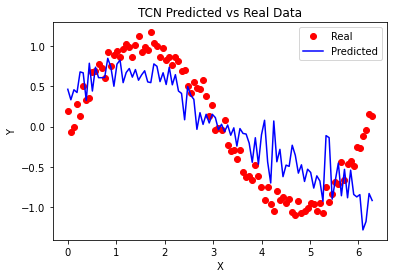

In [25]:


# Define the TCN model
class TCN(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout):
        super(TCN, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(input_size, num_channels, kernel_size=kernel_size, padding=(kernel_size - 1) // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(num_channels, num_channels, kernel_size=kernel_size, padding=(kernel_size - 1) // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(num_channels, output_size, kernel_size=kernel_size, padding=(kernel_size - 1) // 2)
        )

    def forward(self, x):
        return self.tcn(x)

# Create an instance of the TCN model
input_size = 1
output_size = 1
num_channels = 64
kernel_size = 3
dropout = 0.2
model = TCN(input_size, output_size, num_channels, kernel_size, dropout)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the TCN model
def train(model, optimizer, criterion, inputs, targets, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    return losses

# using model
inputs = x_tensor 
targets = y_tensor
num_epochs = 100

losses = train(model, optimizer, criterion, inputs.unsqueeze(2), targets.unsqueeze(2), num_epochs)

# Predict using the trained TCN model
with torch.no_grad():
    predicted = model(inputs.unsqueeze(2)).squeeze()

# Plotting predicted vs real data
plt.plot(inputs.numpy(), targets.numpy(), 'ro', label='Real')
plt.plot(inputs.numpy(), predicted.numpy(), 'b-', label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TCN Predicted vs Real Data')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], Loss: 0.5191
Epoch [200/1000], Loss: 0.5191
Epoch [300/1000], Loss: 0.5191
Epoch [400/1000], Loss: 0.5191
Epoch [500/1000], Loss: 0.5191
Epoch [600/1000], Loss: 0.5191
Epoch [700/1000], Loss: 0.5191
Epoch [800/1000], Loss: 0.5191
Epoch [900/1000], Loss: 0.5191
Epoch [1000/1000], Loss: 0.5191


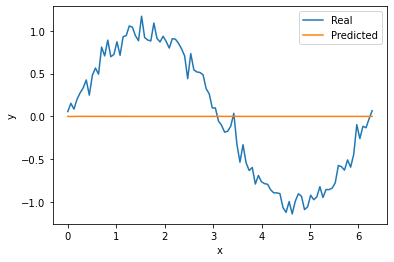

In [35]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Set initial hidden and cell states
        batch_size = x.size(0)
        h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)

        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Forward pass through the fully connected layer
        out = self.fc(out)

        return out.squeeze()

# Create an instance of the LSTM model
input_size = 1
hidden_size = 32
output_size = 1
lstm_model = LSTMModel(input_size, hidden_size, output_size)

# Convert the data to PyTorch tensors
x = np.linspace(0, 2 * np.pi, 100)
y_clean = np.sin(x)
noise = np.random.normal(0, 0.1, len(x))
y = y_clean + noise
x_tensor = torch.from_numpy(x).unsqueeze(1).float()
y_tensor = torch.from_numpy(y).unsqueeze(1).float()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = lstm_model(x_tensor.unsqueeze(0))
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Generate predictions for the entire range of x
with torch.no_grad():
    x_test = torch.linspace(0, 2 * np.pi, 200).unsqueeze(1).float()
    predicted = lstm_model(x_test.unsqueeze(0)).squeeze().numpy()

# Plot the predicted values
plt.plot(x, y, label='Real')
plt.plot(x_test.squeeze(), predicted, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()